SUMBER DATASET: https://www.kaggle.com/datasets/yufengdev/bbc-fulltext-and-category

REFERENSI CODE: https://www.kaggle.com/code/muhammadnss/klasifikasi-teks-berita-bbc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
path = '/content/drive/My Drive/LINTASARTA/'
os.listdir(path)

['bbc-text.csv',
 '[lintasarta]_proyek_pertama_membuat_model_nlp_dengan_tensorflow_81.py',
 '[LINTASARTA]_Proyek_Pertama_Membuat_Model_NLP_dengan_TensorFlow_offline.ipynb',
 '[LINTASARTA]_Proyek_Pertama_Membuat_Model_NLP_dengan_TensorFlow_0.8067.ipynb',
 '[LINTASARTA] Proyek Pertama : Membuat Model NLP dengan TensorFlow',
 'Proyek_Ketiga',
 'REVISI_Proyek_NLP']

In [ ]:
import pandas as pd
df = pd.read_csv(path + 'bbc-text.csv', encoding='utf-8')
#df = pd.read_csv('bbc-text.csv', encoding='utf-8')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
#df = pd.read_csv('/kaggle/input/bbc-fulltext-and-category/bbc-text.csv')

In [ ]:
import numpy as np
import pandas as pd
import itertools
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow import keras
layers = keras.layers
models = keras.models

# Pada program ini menggunakan TensorFlow v1.8
print("Anda menggunakan tensorflow versi : ", tf.__version__)

Anda menggunakan tensorflow versi :  2.15.0


<Axes: xlabel='category'>

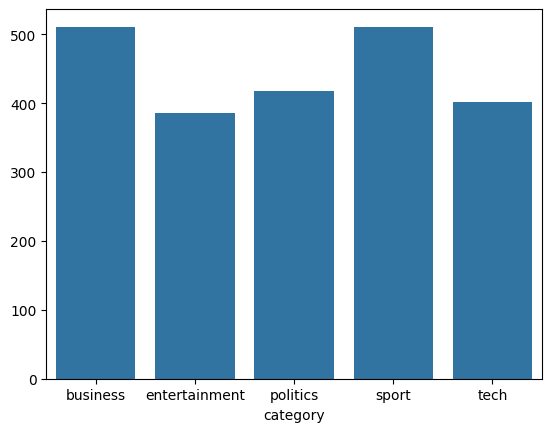

In [ ]:
import seaborn as sns
result = df.groupby(['category']).size()
#plot the result
sns.barplot(x=result.index, y=result.values)

## STOPWORDS

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Pastikan Anda sudah mendownload corpus stopwords untuk bahasa Inggris
nltk.download('stopwords')

# Ambil daftar stopwords bahasa Inggris
english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Function untuk membersihkan stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in english_stopwords]
    return ' '.join(filtered_words)

In [ ]:
df['text'] = df['text'].apply(remove_stopwords)

## One-Hot-Encoding

In [ ]:
kategori = pd.get_dummies(df.category)
df_baru = pd.concat([df, kategori], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,text,business,entertainment,politics,sport,tech
0,tv future hands viewers home theatre systems p...,0,0,0,0,1
1,worldcom boss left books alone former worldcom...,1,0,0,0,0
2,tigers wary farrell gamble leicester say rushe...,0,0,0,1,0
3,yeading face newcastle fa cup premiership side...,0,0,0,1,0
4,ocean twelve raids box office ocean twelve cri...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull us retail figures us retail sales fe...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem a...,0,1,0,0,0
2223,political squabbles snowball become commonplac...,0,0,1,0,0


## mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values

In [ ]:
teks = df_baru['text'].values
label = df_baru[['business', 'entertainment', 'politics', 'sport', 'tech']].values


## bagi data untuk training dan data untuk testing

In [ ]:
from sklearn.model_selection import train_test_split
teks_latih, teks_test, label_latih, label_test = train_test_split(teks, label, test_size=0.2)


## ubah setiap kata ke dalam bilangan numerik dengan fungsi Tokenizer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(teks_latih)
tokenizer.fit_on_texts(teks_test)

sekuens_latih = tokenizer.texts_to_sequences(teks_latih)
sekuens_test = tokenizer.texts_to_sequences(teks_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)


- digunakan layer Embedding dengan dimensi embedding sebesar 16
- dimensi dari input sebesar nilai num_words pada objek tokenizer
- memanggil fungsi compile dan menentukan optimizer serta loss function

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dropout(0.2), # Mengurangi dropout rate
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.2), # Mengurangi dropout rate
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2), # Mengurangi dropout rate
    tf.keras.layers.Dense(5, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

membuat kelas callback

In [ ]:
#class myCallback(tf.keras.callbacks.Callback):
#  def on_epoch_end(self, epoch, logs={}):
#    if logs.get('accuracy') is not None and logs.get('accuracy') > 0.9:
#      print("\nAkurasi telah mencapai >90%!")
#      self.model.stop_training = True

#callbacks = myCallback()  # Instantiate the callback directly

In [ ]:
# utils
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

In [ ]:
import tensorflow as tf

#Callback Function
class accCallback(Callback):
   def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.9 and logs.get('val_accuracy') >= 0.9):
            print("\nAccuracy and Val_Accuracy has reached 90%!", "\nEpoch: ", epoch)
            self.model.stop_training = True

callbacks = accCallback()  # Use the correct class name


In [ ]:
auto_reduction_LR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 2, #setelah 2 epoch, jika tidak ada kenaikan maka LR berkurang
    verbose = 1,
    factor = 0.1,
    min_lr = 0.001
)

In [ ]:
auto_stop_learn = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0,
    patience = 4,
    verbose = 1,
    mode = 'auto'
)

## melatih model dengan memanggil fungsi fit()

In [ ]:
history = model.fit(padded_latih, label_latih,
                    epochs = 50, #50
                    batch_size = 32, #64
                    steps_per_epoch = 30,
                    validation_data = (padded_test, label_test),
                    verbose = 1,
                    callbacks=[callbacks, auto_reduction_LR, auto_stop_learn],
                    )

Epoch 1/50
30/30 [==============================] - 108s 3s/step - loss: 1.6036 - accuracy: 0.2177 - val_loss: 1.6004 - val_accuracy: 0.2315 - lr: 0.0010
Epoch 2/50
30/30 [==============================] - 101s 3s/step - loss: 1.6033 - accuracy: 0.2342 - val_loss: 1.5857 - val_accuracy: 0.2382 - lr: 0.0010
Epoch 3/50
30/30 [==============================] - 103s 3s/step - loss: 1.5621 - accuracy: 0.3021 - val_loss: 1.5025 - val_accuracy: 0.2921 - lr: 0.0010
Epoch 4/50
30/30 [==============================] - 104s 3s/step - loss: 1.2594 - accuracy: 0.3987 - val_loss: 1.0787 - val_accuracy: 0.3820 - lr: 0.0010
Epoch 5/50
30/30 [==============================] - 103s 3s/step - loss: 1.0206 - accuracy: 0.4323 - val_loss: 0.9794 - val_accuracy: 0.4966 - lr: 0.0010
Epoch 6/50
30/30 [==============================] - 102s 3s/step - loss: 0.9813 - accuracy: 0.5000 - val_loss: 1.1237 - val_accuracy: 0.3708 - lr: 0.0010
Epoch 7/50
30/30 [==============================] - 104s 3s/step - loss: 0.9

Plot akurasi model

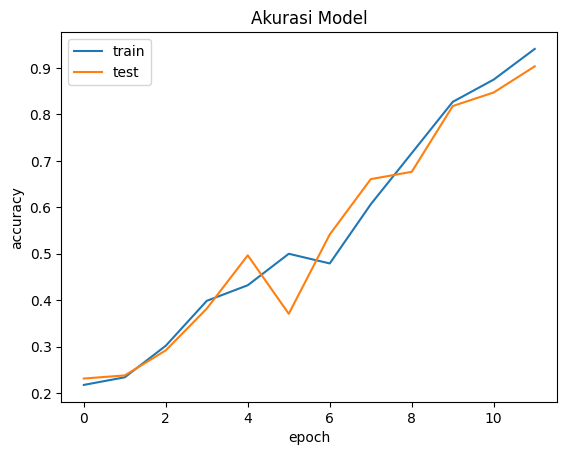

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plot loss

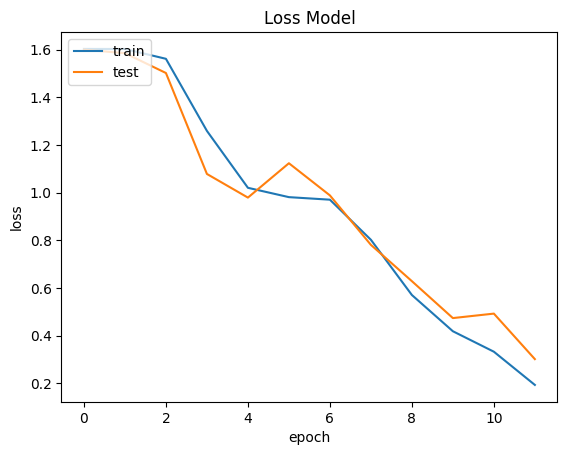

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
